### Importer les bibliothèques utiles

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_style("darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Lire les données

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/inrae/icos/FR-Bil_subset.csv')
# data = pd.read_csv('../data/FR-Bil_subset.csv') # si téléchargé depuis github
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.head()

,Unnamed: 0,station.name,DateTime,Tair,Rg,NEE_F,NEE_F_QC,GPP,VPD,P,LE_F,RECO,SWC10cm,SWC20cm,SWC50cm,SWC_3
0,1,FR-Bil,2014-01-01 00:30:00,8.725,0.0,9.42146,3,-4.35020,0.005,0.0,0.452558,4.88267,NaN,NaN,NaN,NaN
1,2,FR-Bil,2014-01-01 01:00:00,8.664,0.0,8.30763,3,-3.25360,0.000,0.0,0.625461,4.86652,NaN,NaN,NaN,NaN
2,3,FR-Bil,2014-01-01 01:30:00,8.402,0.0,8.52988,3,-3.54959,0.000,0.0,0.614900,4.79737,NaN,NaN,NaN,NaN
3,4,FR-Bil,2014-01-01 02:00:00,8.474,0.0,8.78492,3,-3.78440,0.000,0.0,0.541141,4.81634,NaN,NaN,NaN,NaN
4,5,FR-Bil,2014-01-01 02:30:00,8.507,0.0,7.94900,3,-2.93920,0.000,0.0,-0.312608,4.82504,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Unnamed: 0', 'station.name', 'DateTime', 'Tair', 'Rg', 'NEE_F',
       'NEE_F_QC', 'GPP', 'VPD', 'P', 'LE_F', 'RECO', 'SWC10cm', 'SWC20cm',
       'SWC50cm', 'SWC_3'],
      dtype='object')

In [ ]:
data.info() # 155808 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155808 entries, 0 to 155807
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    155808 non-null  int64         
 1   station.name  155808 non-null  object        
 2   DateTime      155808 non-null  datetime64[ns]
 3   Tair          155808 non-null  float64       
 4   Rg            153199 non-null  float64       
 5   NEE_F         155808 non-null  float64       
 6   NEE_F_QC      155808 non-null  int64         
 7   GPP           155808 non-null  float64       
 8   VPD           153107 non-null  float64       
 9   P             155808 non-null  float64       
 10  LE_F          155808 non-null  float64       
 11  RECO          155808 non-null  float64       
 12  SWC10cm       143063 non-null  float64       
 13  SWC20cm       143052 non-null  float64       
 14  SWC50cm       131656 non-null  float64       
 15  SWC_3         142

In [ ]:
data[data['station.name']!='FR-Bil'] # on travaille sur 1 seul site

,Unnamed: 0,station.name,DateTime,Tair,Rg,NEE_F,NEE_F_QC,GPP,VPD,P,LE_F,RECO,SWC10cm,SWC20cm,SWC50cm,SWC_3


In [ ]:
data.isna().sum() # valeurs manquantes de Rg, VPD et SWC

Unnamed: 0          0
station.name        0
DateTime            0
Tair                0
Rg               2609
NEE_F               0
NEE_F_QC            0
GPP                 0
VPD              2701
P                   0
LE_F                0
RECO                0
SWC10cm         12745
SWC20cm         12756
SWC50cm         24152
SWC_3           12985
dtype: int64

In [ ]:
max_date = data['DateTime'].max()
min_date = data['DateTime'].min()
duration = max_date - min_date
duration

Timedelta('3245 days 23:30:00')

In [ ]:
duration.days//365 # 8 years

8

In [ ]:
first_date = data.iloc[0].DateTime
print(f"de : {first_date}")
last_date = data.iloc[-1].DateTime
print(f"à : {last_date}")

de : 2014-01-01 00:30:00
à : 2022-11-21 00:00:00


In [ ]:
df1 = data[data.DateTime.dt.year==2014] # 8486 valeurs manquantes de SWC_3
df1.isna().sum()

Unnamed: 0         0
station.name       0
DateTime           0
Tair               0
Rg                 0
NEE_F              0
NEE_F_QC           0
GPP                0
VPD                0
P                  0
LE_F               0
RECO               0
SWC10cm         8484
SWC20cm         8485
SWC50cm         8485
SWC_3           8486
dtype: int64

In [ ]:
df2 = data[(data.DateTime.dt.year >= 2015) & (data.DateTime.dt.year <= 2021)] # dataset entre 2015 et 2021
df2.isna().sum()

Unnamed: 0         0
station.name       0
DateTime           0
Tair               0
Rg                 0
NEE_F              0
NEE_F_QC           0
GPP                0
VPD                0
P                  0
LE_F               0
RECO               0
SWC10cm         1905
SWC20cm         1909
SWC50cm         7555
SWC_3            315
dtype: int64

<ipython-input-50-8c1913542a39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Missing'] = df2['SWC_3'].isna()


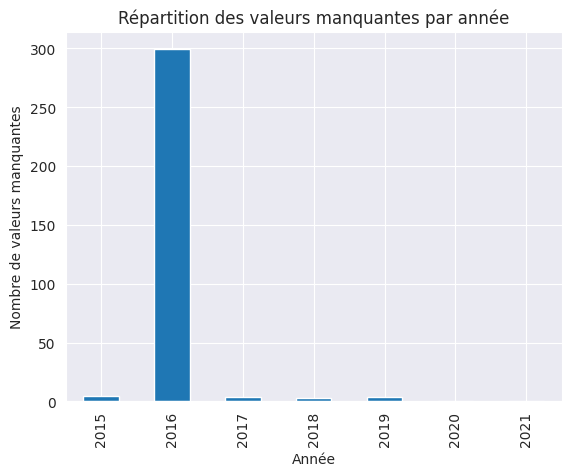

In [ ]:
df2['Missing'] = df2['SWC_3'].isna()

# regrouper par année et compter le nombre de valeurs manquantes
missing_counts_year = df2.groupby(df2['DateTime'].dt.year)['Missing'].sum()

# répartition des valeurs manquantes
missing_counts_year.plot(kind='bar')
plt.xlabel('Année')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Répartition des valeurs manquantes par année')
plt.show()

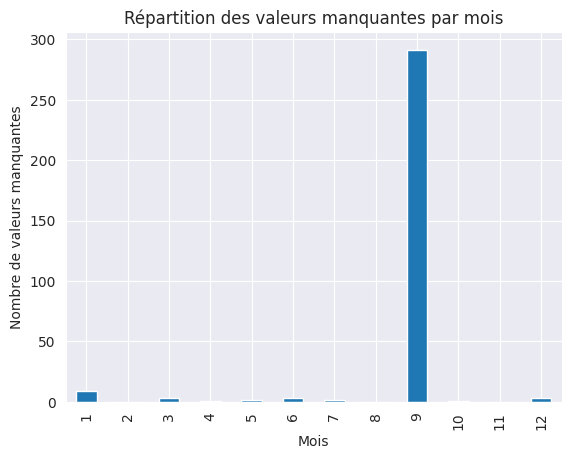

In [ ]:
# idem pour les mois et les jours
missing_counts_month = df2.groupby(df2['DateTime'].dt.month)['Missing'].sum()

missing_counts_month.plot(kind='bar')
plt.xlabel('Mois')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Répartition des valeurs manquantes par mois')
plt.show()

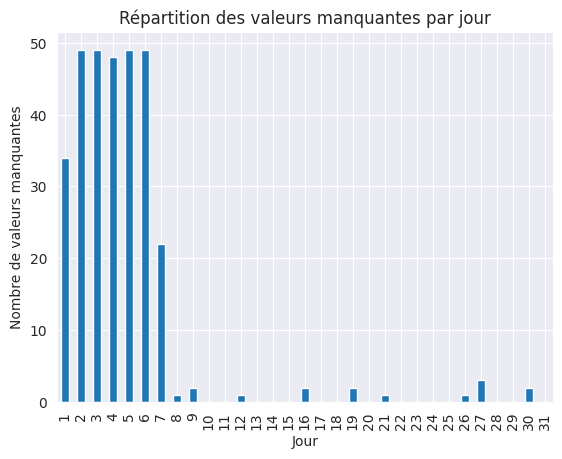

In [ ]:
missing_counts_day = df2.groupby(df2['DateTime'].dt.day)['Missing'].sum()

missing_counts_day.plot(kind='bar')
plt.xlabel('Jour')
plt.ylabel('Nombre de valeurs manquantes')
plt.title('Répartition des valeurs manquantes par jour')
plt.show()

In [ ]:
df22=data[(data.DateTime.dt.date >= pd.to_datetime('2016-09-01').date()) & (data.DateTime.dt.date <= pd.to_datetime('2016-09-07').date())]
df22.isna().sum() # seulement la première semaine de septembre 2016, on remarque que la plupart des NAs swc sont concentrés ici

Unnamed: 0        0
station.name      0
DateTime          0
Tair              0
Rg                0
NEE_F             0
NEE_F_QC          0
GPP               0
VPD               0
P                 0
LE_F              0
RECO              0
SWC10cm         290
SWC20cm         290
SWC50cm         290
SWC_3           290
dtype: int64

**Entre 2015 et 2021, valeurs manquantes de SWC_3 principalement concentrées en 2016, plus précisément la première semaine de Septembre.**

In [ ]:
df3 = data[data.DateTime.dt.year==2022] # 4184 NAN (SWC_3)
df3.isna().sum()

Unnamed: 0         0
station.name       0
DateTime           0
Tair               0
Rg              2609
NEE_F              0
NEE_F_QC           0
GPP                0
VPD             2701
P                  0
LE_F               0
RECO               0
SWC10cm         2356
SWC20cm         2362
SWC50cm         8112
SWC_3           4184
dtype: int64

In [ ]:
df = df2.copy() # extraction de données de df2, on a éliminé 2014 et 2022 étant donné qu'elles contiennt énormément de valeurs manquantes de SWC

df['Time (s)'] = df['DateTime'].apply(lambda x: x.timestamp()) # convertir t en secondes
df['Time (s)'] = df['Time (s)'] - df['Time (s)'].iloc[0] # commencer de 0

# forme sinusoïdale pour le temps (entrée utile pour le modèle, celui-ci saura se situer dans le temps)
d = 24*3600
df['cos day'] = np.cos(df['Time (s)']*(2*np.pi/d))
df['sin day'] = np.sin(df['Time (s)']*(2*np.pi/d))

y = 365*d
df['cos year'] = np.cos(df['Time (s)']*(2*np.pi/y))
df['sin year'] = np.sin(df['Time (s)']*(2*np.pi/y))
df = df.reset_index(drop=True)
df.head()

,Unnamed: 0,station.name,DateTime,Tair,Rg,NEE_F,NEE_F_QC,GPP,VPD,P,LE_F,RECO,SWC10cm,SWC20cm,SWC50cm,SWC_3,Missing,Time (s),cos day,sin day,cos year,sin year
0,17520,FR-Bil,2015-01-01 00:00:00,5.221,0.0,1.975450,1,-0.324961,1.117,0.0,1.881880,1.78319,NaN,NaN,NaN,NaN,True,0.0,1.000000,0.000000,1.000000,0.000000
1,17521,FR-Bil,2015-01-01 00:30:00,-1.117,0.0,1.126370,1,0.136148,0.450,0.0,2.581960,1.21327,10.0650,7.300,11.669,7.779,False,1800.0,0.991445,0.130526,1.000000,0.000359
2,17522,FR-Bil,2015-01-01 01:00:00,-1.395,0.0,0.977861,1,0.259992,0.429,0.0,1.264360,1.18810,10.0480,7.287,11.664,7.756,False,3600.0,0.965926,0.258819,1.000000,0.000717
3,17523,FR-Bil,2015-01-01 01:30:00,-1.764,0.0,0.977861,1,0.227536,0.378,0.0,1.703280,1.15503,10.0485,7.272,11.660,7.756,False,5400.0,0.923880,0.382683,0.999999,0.001076
4,17524,FR-Bil,2015-01-01 02:00:00,-1.934,0.0,1.975450,1,-0.784896,0.305,0.0,-0.086838,1.13993,10.0440,7.273,11.660,7.756,False,7200.0,0.866025,0.500000,0.999999,0.001435


In [ ]:
df['SWC_3'].describe()

count    122421.000000
mean         11.634264
std           8.846413
min           0.460000
25%           4.775000
50%           9.820000
75%          15.914000
max          40.341000
Name: SWC_3, dtype: float64

In [ ]:
indices_nan = np.where(df['SWC_3'].isna())[0] # les indices des nan de swc
indices_nan # les indices nan successifs correspondent à la première semaine de septembre 2016

array([    0,  8208, 13152, 16448, 16449, 17520, 18384, 22128, 23856,
       24528, 26231, 26232, 27523, 27524, 29251, 29252, 29253, 29254,
       29255, 29256, 29257, 29258, 29259, 29260, 29261, 29262, 29263,
       29264, 29265, 29266, 29267, 29268, 29269, 29270, 29271, 29272,
       29273, 29274, 29275, 29276, 29277, 29278, 29279, 29280, 29281,
       29282, 29283, 29284, 29285, 29286, 29287, 29288, 29289, 29290,
       29291, 29292, 29293, 29294, 29295, 29296, 29297, 29298, 29299,
       29300, 29301, 29302, 29303, 29304, 29305, 29306, 29307, 29308,
       29309, 29310, 29311, 29312, 29313, 29314, 29315, 29316, 29317,
       29318, 29319, 29320, 29321, 29322, 29323, 29324, 29325, 29326,
       29327, 29328, 29329, 29330, 29331, 29332, 29333, 29334, 29335,
       29336, 29337, 29338, 29339, 29340, 29341, 29342, 29343, 29344,
       29345, 29346, 29347, 29348, 29349, 29350, 29351, 29352, 29353,
       29354, 29355, 29356, 29357, 29358, 29359, 29360, 29361, 29362,
       29363, 29364,

In [ ]:
df['filled_SWC_3']=df['SWC_3'].copy() # nouvelle colonne pour stocker le swc_3 modifié

In [ ]:
# pour la première valeur, j'ai pris celle qui suit étant donné qu'il n'y a pas une grande variabilité dans les valeurs SWC_3 dans un laps de temps
index_nan = 0
df.loc[index_nan, 'filled_SWC_3'] = df.loc[index_nan+1,'filled_SWC_3']

In [ ]:
# cette liste contient uniquement les indices de SWC_3 NaN isolés (la première semaine de septembre 2016) sera traitée après
extracted_indices_nan = [8208, 13152, 16448, 16449, 17520, 18384, 22128, 23856,24528, 26231, 26232,27523, 27524, 35088, 36363,38668, 38669, 52608, 52800, 69504, 70128, 70464, 73248, 81888]

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
# stocker chaque valeur de SWC_3 nan ainsi que les 5 valeurs précédentes/suivantes dans un dataframe pour visualiser la variabilité de SWC_3
rows = []
for idx in extracted_indices_nan:
    indices = list(range(idx-5, idx+6)) # indices des 5 valeurs précédentes et suivantes
    row = df['SWC_3'].iloc[indices].tolist()
    rows.append(row)

col_names = [f'SWC_t-{i}' for i in range(1,6)]+['SWC_t']+[f'SWC_t+{i}' for i in range(1,6)]
df_nan = pd.DataFrame(rows,columns=col_names,index=extracted_indices_nan) # définir comme indice l'indice de référence du dataframe initial
df_nan

,SWC_t-1,SWC_t-2,SWC_t-3,SWC_t-4,SWC_t-5,SWC_t,SWC_t+1,SWC_t+2,SWC_t+3,SWC_t+4,SWC_t+5
8208,2.466,2.465,2.465,2.465,2.464,NaN,2.465,2.466,2.472,2.479,2.480
13152,2.036,2.033,2.030,2.031,2.030,NaN,2.032,2.033,2.035,2.035,2.034
16448,5.190,5.190,5.190,5.172,5.170,NaN,NaN,5.170,5.170,5.170,5.170
16449,5.190,5.190,5.172,5.170,NaN,NaN,5.170,5.170,5.170,5.170,5.170
17520,3.749,3.750,3.750,3.750,3.749,NaN,5.300,5.309,5.319,5.320,5.320
18384,15.168,15.166,15.124,15.062,14.986,NaN,14.868,14.749,14.665,14.589,14.560
22128,21.342,21.320,21.307,21.291,21.288,NaN,21.268,21.263,21.240,21.240,21.240
23856,13.473,13.451,13.437,13.438,13.419,NaN,13.410,13.401,13.384,13.386,13.387
24528,11.210,11.210,11.210,11.210,11.200,NaN,11.186,11.187,11.187,11.187,11.190
26231,9.070,9.054,9.021,8.788,7.940,NaN,NaN,7.855,7.805,7.775,7.738


In [ ]:
"""
en observant le dataframe, il n'a pas une variabilité significative entre les valeurs dans l'intervalle spécifié,
le choix d'interpolation linéaire semble approprié
"""
for index_nan in extracted_indices_nan:
  df.loc[index_nan, 'filled_SWC_3'] = df['filled_SWC_3'].interpolate().loc[index_nan]

In [ ]:
# résultat de l'interpolation (SWC_t rempli)
rows = []
for idx in extracted_indices_nan:
    indices = list(range(idx-5, idx+6)) # indices des 5 valeurs précédentes et suivantes
    row = df['filled_SWC_3'].iloc[indices].tolist()
    rows.append(row)

col_names = [f'SWC_t-{i}' for i in range(1,6)]+['SWC_t']+[f'SWC_t+{i}' for i in range(1,6)]
updated_df_nan = pd.DataFrame(rows,columns=col_names,index=extracted_indices_nan) # définir comme indice l'indice de référence du dataframe initial
updated_df_nan

,SWC_t-1,SWC_t-2,SWC_t-3,SWC_t-4,SWC_t-5,SWC_t,SWC_t+1,SWC_t+2,SWC_t+3,SWC_t+4,SWC_t+5
8208,2.466,2.465,2.465,2.465,2.464000,2.464500,2.465000,2.466,2.472,2.479,2.480
13152,2.036,2.033,2.030,2.031,2.030000,2.031000,2.032000,2.033,2.035,2.035,2.034
16448,5.190,5.190,5.190,5.172,5.170000,5.170000,5.170000,5.170,5.170,5.170,5.170
16449,5.190,5.190,5.172,5.170,5.170000,5.170000,5.170000,5.170,5.170,5.170,5.170
17520,3.749,3.750,3.750,3.750,3.749000,4.524500,5.300000,5.309,5.319,5.320,5.320
18384,15.168,15.166,15.124,15.062,14.986000,14.927000,14.868000,14.749,14.665,14.589,14.560
22128,21.342,21.320,21.307,21.291,21.288000,21.278000,21.268000,21.263,21.240,21.240,21.240
23856,13.473,13.451,13.437,13.438,13.419000,13.414500,13.410000,13.401,13.384,13.386,13.387
24528,11.210,11.210,11.210,11.210,11.200000,11.193000,11.186000,11.187,11.187,11.187,11.190
26231,9.070,9.054,9.021,8.788,7.940000,7.911667,7.883333,7.855,7.805,7.775,7.738


In [ ]:
remaining_indices_nan = np.where(df['filled_SWC_3'].isna())[0] # les indices qui sont tjrs non-renseignés

In [ ]:
for i in range(1,len(remaining_indices_nan)): # petite vérification
  if remaining_indices_nan[i]!=remaining_indices_nan[i-1]+1:
    print('opss')
print('valeurs effectivement successives !!')

valeurs effectivement successives !!


In [ ]:
# un dataframe qui affiche les 235 valeurs avant la première valeur NaN et les 235 après la dernière valeur NaN en septembre 2016
rows = []

range_1 = list(range(remaining_indices_nan[0]-235,remaining_indices_nan[0]+1))
range_2 = list(range(remaining_indices_nan[-1],remaining_indices_nan[-1]+235+1))
row_1 = df['SWC_3'].iloc[range_1].tolist()
row_2 = df['SWC_3'].iloc[range_2].tolist()
rows.append(row_1)
rows.append(row_2)

col_names = ['SWC_t']+[f'SWC_{i+1}' for i in range(len(rows[0])-1)]
df_nan_2016 = pd.DataFrame(rows,columns=col_names)
df_nan_2016

,SWC_t,SWC_1,SWC_2,SWC_3,SWC_4,SWC_5,SWC_6,SWC_7,SWC_8,SWC_9,SWC_10,SWC_11,SWC_12,SWC_13,SWC_14,SWC_15,SWC_16,SWC_17,SWC_18,SWC_19,SWC_20,SWC_21,SWC_22,SWC_23,SWC_24,SWC_25,SWC_26,SWC_27,SWC_28,SWC_29,SWC_30,SWC_31,SWC_32,SWC_33,SWC_34,SWC_35,SWC_36,SWC_37,SWC_38,SWC_39,SWC_40,SWC_41,SWC_42,SWC_43,SWC_44,SWC_45,SWC_46,SWC_47,SWC_48,SWC_49,SWC_50,SWC_51,SWC_52,SWC_53,SWC_54,SWC_55,SWC_56,SWC_57,SWC_58,SWC_59,SWC_60,SWC_61,SWC_62,SWC_63,SWC_64,SWC_65,SWC_66,SWC_67,SWC_68,SWC_69,SWC_70,SWC_71,SWC_72,SWC_73,SWC_74,SWC_75,SWC_76,SWC_77,SWC_78,SWC_79,SWC_80,SWC_81,SWC_82,SWC_83,SWC_84,SWC_85,SWC_86,SWC_87,SWC_88,SWC_89,SWC_90,SWC_91,SWC_92,SWC_93,SWC_94,SWC_95,SWC_96,SWC_97,SWC_98,SWC_99,SWC_100,SWC_101,SWC_102,SWC_103,SWC_104,SWC_105,SWC_106,SWC_107,SWC_108,SWC_109,SWC_110,SWC_111,SWC_112,SWC_113,SWC_114,SWC_115,SWC_116,SWC_117,SWC_118,SWC_119,SWC_120,SWC_121,SWC_122,SWC_123,SWC_124,SWC_125,SWC_126,SWC_127,SWC_128,SWC_129,SWC_130,SWC_131,SWC_132,SWC_133,SWC_134,SWC_135,SWC_136,SWC_137,SWC_138,SWC_139,SWC_140,SWC_141,SWC_142,SWC_143,SWC_144,SWC_145,SWC_146,SWC_147,SWC_148,SWC_149,SWC_150,SWC_151,SWC_152,SWC_153,SWC_154,SWC_155,SWC_156,SWC_157,SWC_158,SWC_159,SWC_160,SWC_161,SWC_162,SWC_163,SWC_164,SWC_165,SWC_166,SWC_167,SWC_168,SWC_169,SWC_170,SWC_171,SWC_172,SWC_173,SWC_174,SWC_175,SWC_176,SWC_177,SWC_178,SWC_179,SWC_180,SWC_181,SWC_182,SWC_183,SWC_184,SWC_185,SWC_186,SWC_187,SWC_188,SWC_189,SWC_190,SWC_191,SWC_192,SWC_193,SWC_194,SWC_195,SWC_196,SWC_197,SWC_198,SWC_199,SWC_200,SWC_201,SWC_202,SWC_203,SWC_204,SWC_205,SWC_206,SWC_207,SWC_208,SWC_209,SWC_210,SWC_211,SWC_212,SWC_213,SWC_214,SWC_215,SWC_216,SWC_217,SWC_218,SWC_219,SWC_220,SWC_221,SWC_222,SWC_223,SWC_224,SWC_225,SWC_226,SWC_227,SWC_228,SWC_229,SWC_230,SWC_231,SWC_232,SWC_233,SWC_234,SWC_235
0,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.77,0.766,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.748,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.740,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.74,0.727,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.720,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.72,0.717,0.708,0.707,0.707,0.708,0.707,0.708,0.707,0.708,0.707,0.707,0.708,0.708,0.707,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.707,0.708,0.708,0.708,0.707,0.708,0.708,0.708,0.708,0.708,0.708,0.708,0.707,0.708,0.708,0.707,0.708,0.708,0.708,0.708,0.708,0.708,0.707,0.703,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69,0.69,NaN
1,NaN,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.640,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.640,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.636,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.630,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.634,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.64,0.640,0.640,0.635,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630,0.630

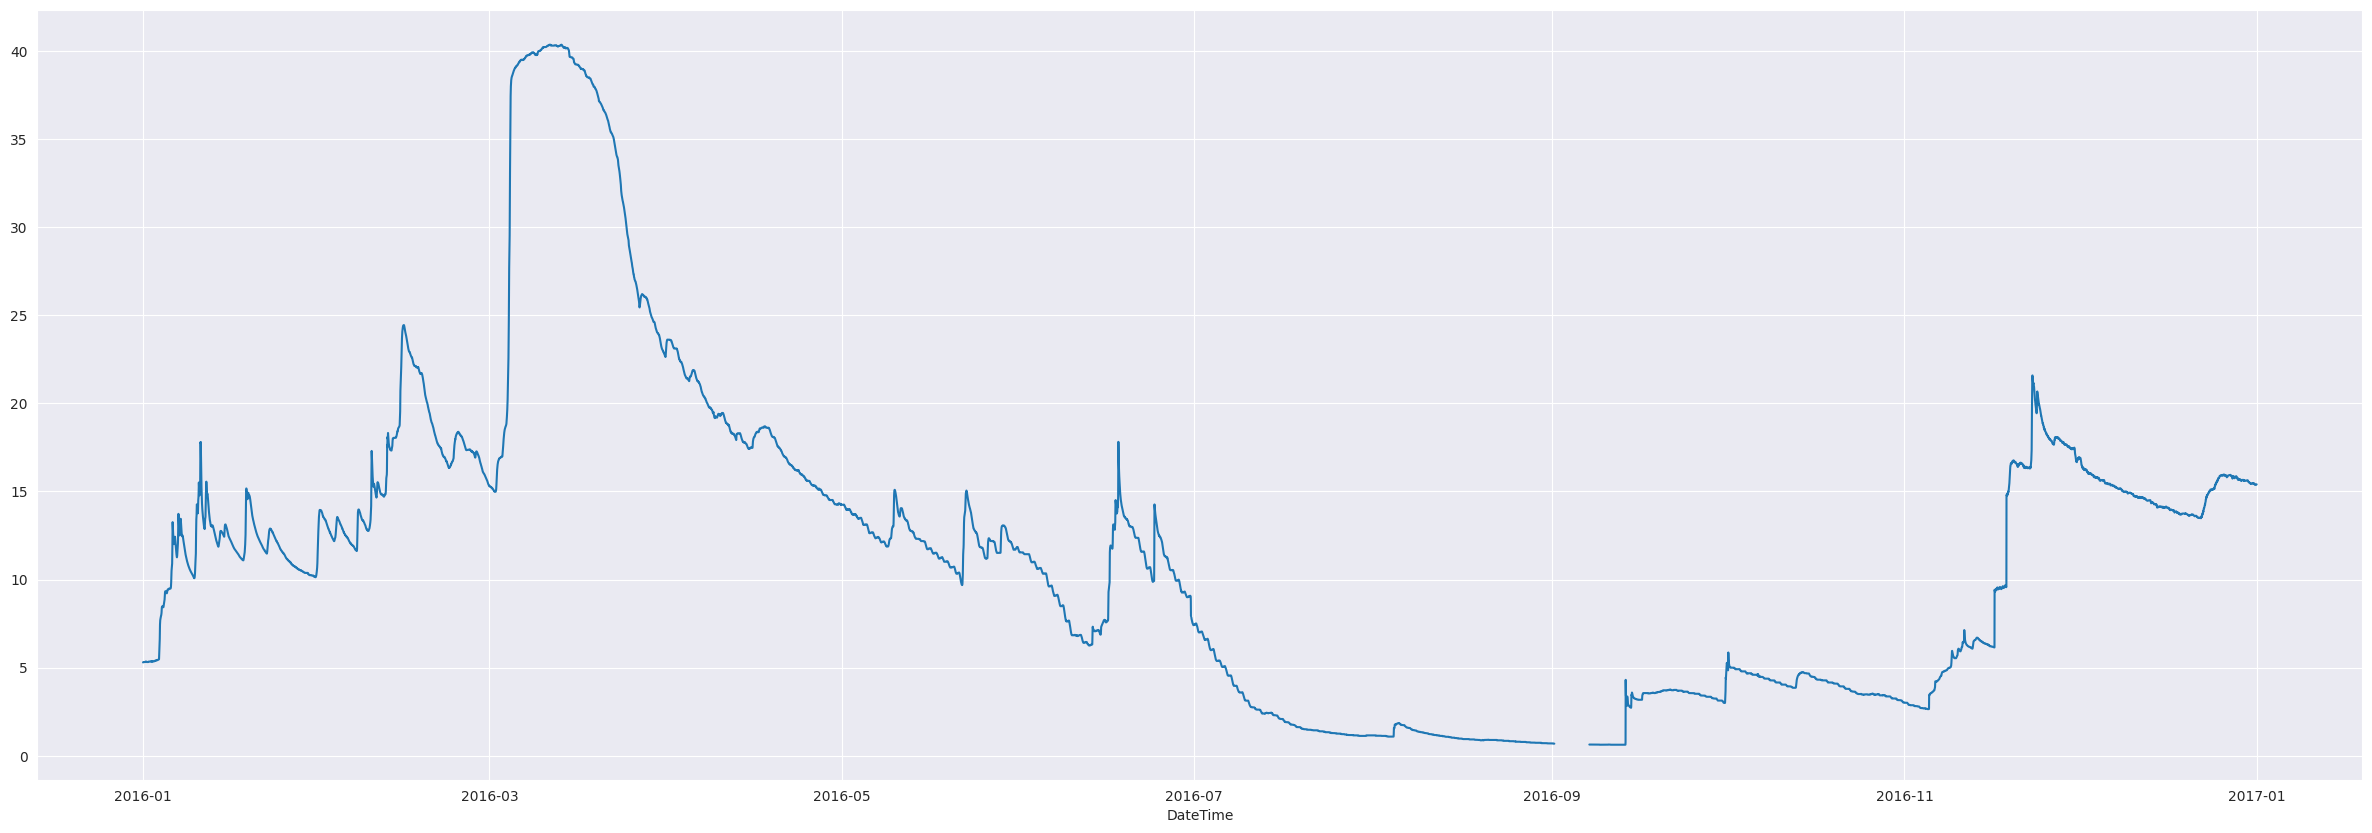

In [ ]:
# Courbe SWC_3 en fonction du temps (remarquer la discontinuité début semptembre)
data_2016 = df[df['DateTime'].dt.year==2016]

plt.figure(figsize=(30,10))

plt.plot(data_2016['DateTime'], data_2016['SWC_3'])

plt.xlabel('DateTime')
plt.show()

In [ ]:
"""
En observant les observations avant et après les NaN (sur le dataframe et même graphiquement), nous avons l'impression qu'à chaque fois,
il y a une période de stagnation avant qu'il y ait une légère décroissance.. on va essayer d'imiter ce comportement
puisque nous n'avons aucune visibilité sur la période à part la variabilité du swc avant et après.
"""

def fill_missing_values(column,remaining_indices_nan,start_value,end_value):

    values = np.linspace(start_value, end_value, len(remaining_indices_nan))  # valeurs décroissantes sur une plage définie

    for i, index in enumerate(remaining_indices_nan):  # on parcourt la liste des valeurs Nas de SWC_3 de la fameuse période (septembre 2016)
        column[index] = round(values[i],2)  # on remplit les NAs de la colonne avec les valeurs décroissantes

In [ ]:
start_value = 0.69 # dernière valeur de swc avant la période en question
end_value = 0.64   # première valeur swc juste après la période
fill_missing_values(df['filled_SWC_3'], remaining_indices_nan, start_value, end_value)

<ipython-input-69-8673b0107579>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[index] = round(values[i],2)  # on remplit les NAs de la colonne avec les valeurs décroissantes


In [ ]:
df['filled_SWC_3'].isna().sum() # toutes les valeurs ont été bien remplies

0

In [ ]:
df.head()

,Unnamed: 0,station.name,DateTime,Tair,Rg,NEE_F,NEE_F_QC,GPP,VPD,P,LE_F,RECO,SWC10cm,SWC20cm,SWC50cm,SWC_3,Missing,Time (s),cos day,sin day,cos year,sin year,filled_SWC_3
0,17520,FR-Bil,2015-01-01 00:00:00,5.221,0.0,1.975450,1,-0.324961,1.117,0.0,1.881880,1.78319,NaN,NaN,NaN,NaN,True,0.0,1.000000,0.000000,1.000000,0.000000,7.779
1,17521,FR-Bil,2015-01-01 00:30:00,-1.117,0.0,1.126370,1,0.136148,0.450,0.0,2.581960,1.21327,10.0650,7.300,11.669,7.779,False,1800.0,0.991445,0.130526,1.000000,0.000359,7.779
2,17522,FR-Bil,2015-01-01 01:00:00,-1.395,0.0,0.977861,1,0.259992,0.429,0.0,1.264360,1.18810,10.0480,7.287,11.664,7.756,False,3600.0,0.965926,0.258819,1.000000,0.000717,7.756
3,17523,FR-Bil,2015-01-01 01:30:00,-1.764,0.0,0.977861,1,0.227536,0.378,0.0,1.703280,1.15503,10.0485,7.272,11.660,7.756,False,5400.0,0.923880,0.382683,0.999999,0.001076,7.756
4,17524,FR-Bil,2015-01-01 02:00:00,-1.934,0.0,1.975450,1,-0.784896,0.305,0.0,-0.086838,1.13993,10.0440,7.273,11.660,7.756,False,7200.0,0.866025,0.500000,0.999999,0.001435,7.756


In [ ]:
df.to_csv('/content/drive/MyDrive/inrae/icos/preprocessed_dataICOS_SWC3.csv', index=False)

### Analyse de l'autocorrélation

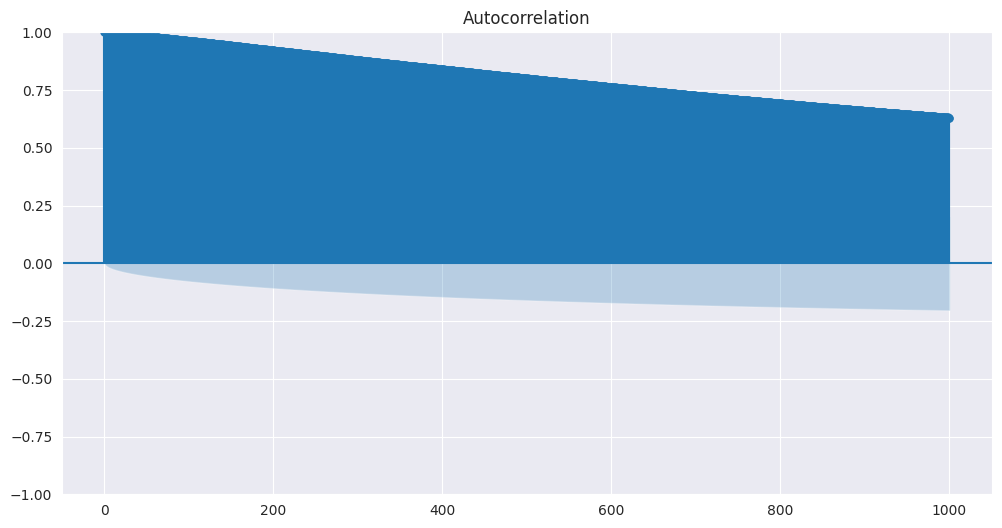

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(12, 6))
acf_plot = plot_acf(df['SWC_3'].values, lags=1000, missing='conservative', ax=ax)

plt.show()

In [ ]:
import statsmodels.api as sm

acf_values, confidence_interval,_,p_values = sm.tsa.acf(df['SWC_3'], nlags=len(data)-1, alpha=0.05, qstat=True,missing='conservative')

print(acf_values)
print()
print(p_values)
print()
print(confidence_interval)

[ 1.          0.99948599  0.99916159 ... -0.0158925  -0.01589977
 -0.01590695]

[0. 0. 0. ... 0. 0. 0.]

[[ 1.          1.        ]
 [ 0.99389148  1.00508051]
 [ 0.98947493  1.00884824]
 ...
 [-0.55247588  0.52069089]
 [-0.55248317  0.52068363]
 [-0.55249036  0.52067647]]


## Dataframe avec les moyennes journalières

En raison des problèmes de mémoire rencontrés, nous allons créer un nouveau dataset avec des moyennes journalières

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/inrae/icos/preprocessed_dataICOS_SWC3.csv')
# df = pd.read_csv('../data/preprocessed_dataICOS_SWC3.csv') # si téléchargé depuis github
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

,Unnamed: 0,station.name,DateTime,Tair,Rg,NEE_F,NEE_F_QC,GPP,VPD,P,...,SWC20cm,SWC50cm,SWC_3,Missing,Time (s),cos day,sin day,cos year,sin year,filled_SWC_3
0,17520,FR-Bil,2015-01-01 00:00:00,5.221,0.0,1.975450,1,-0.324961,1.117,0.0,...,NaN,NaN,NaN,True,0.0,1.000000,0.000000,1.000000,0.000000,7.779
1,17521,FR-Bil,2015-01-01 00:30:00,-1.117,0.0,1.126370,1,0.136148,0.450,0.0,...,7.300,11.669,7.779,False,1800.0,0.991445,0.130526,1.000000,0.000359,7.779
2,17522,FR-Bil,2015-01-01 01:00:00,-1.395,0.0,0.977861,1,0.259992,0.429,0.0,...,7.287,11.664,7.756,False,3600.0,0.965926,0.258819,1.000000,0.000717,7.756
3,17523,FR-Bil,2015-01-01 01:30:00,-1.764,0.0,0.977861,1,0.227536,0.378,0.0,...,7.272,11.660,7.756,False,5400.0,0.923880,0.382683,0.999999,0.001076,7.756
4,17524,FR-Bil,2015-01-01 02:00:00,-1.934,0.0,1.975450,1,-0.784896,0.305,0.0,...,7.273,11.660,7.756,False,7200.0,0.866025,0.500000,0.999999,0.001435,7.756


In [ ]:
df_daily = df.resample('D', on='DateTime').mean().reset_index()
df_daily.head()

<ipython-input-17-610247c9d6be>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_daily = df.resample('D', on='DateTime').mean().reset_index()


,DateTime,Unnamed: 0,Tair,Rg,NEE_F,NEE_F_QC,GPP,VPD,P,LE_F,...,SWC20cm,SWC50cm,SWC_3,Missing,Time (s),cos day,sin day,cos year,sin year,filled_SWC_3
0,2015-01-01,17543.5,0.014729,88.681833,0.222969,1.000000,1.159842,1.515104,0.000000,4.140490,...,7.194979,11.595638,7.670255,0.020833,42300.0,-6.476301e-17,9.830100e-18,0.999952,0.008428,7.672521
1,2015-01-02,17591.5,2.690792,68.076188,0.217475,0.895833,1.426521,1.365354,0.000000,2.559709,...,7.032708,11.369500,7.468792,0.000000,128700.0,-7.401487e-17,-1.040834e-17,0.999659,0.025639,7.468792
2,2015-01-03,17639.5,10.240750,29.018062,0.708765,0.395833,1.686733,1.155271,0.022958,3.326970,...,6.904583,11.158479,7.308396,0.000000,215100.0,-8.326673e-17,4.683753e-17,0.999069,0.042843,7.308396
3,2015-01-04,17687.5,12.426646,33.440333,0.626996,0.583333,2.003186,1.586000,0.043812,8.334650,...,6.798146,10.879333,7.250354,0.000000,301500.0,-6.476301e-17,6.476301e-17,0.998184,0.060034,7.250354
4,2015-01-05,17735.5,6.448604,63.588063,-0.982524,0.645833,3.010173,0.601437,0.000000,7.636533,...,6.767479,10.859479,7.251708,0.000000,387900.0,-6.013708e-17,-6.418477e-17,0.997003,0.077207,7.251708


In [ ]:
df_daily.to_csv('/content/drive/MyDrive/inrae/icos/dailyAVG_dataICOS_2015_2021.csv', index=False)